In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv("D:\Data\HousingInventory_EDA.csv", low_memory=False)
df.shape

(252717, 87)

### Market Overview

In [3]:
print("Houses:",df.building.notnull().count())
print("Market Total: $"+str(round(df.just_value.sum()/1000000000,1))+" billion")
print("Median Age:", int(df.age.median()))
print("Median Effective Age:", int(df.effec_age.median()))
print("Median Building Area:", int(df.gross_sf.median()),"square feet")
print("Median Heated Area:", int(df.heated_sf.median()),"square feet")
print("Median Lot Area:", int(df.lot_sf.median()),"square feet")
print("Median Valuation: $"+str(int(df.just_value.median())))

Houses: 252717
Market Total: $49.6 billion
Median Age: 39
Median Effective Age: 34
Median Building Area: 2142 square feet
Median Heated Area: 1644 square feet
Median Lot Area: 9502 square feet
Median Valuation: $164256


### Home Construction

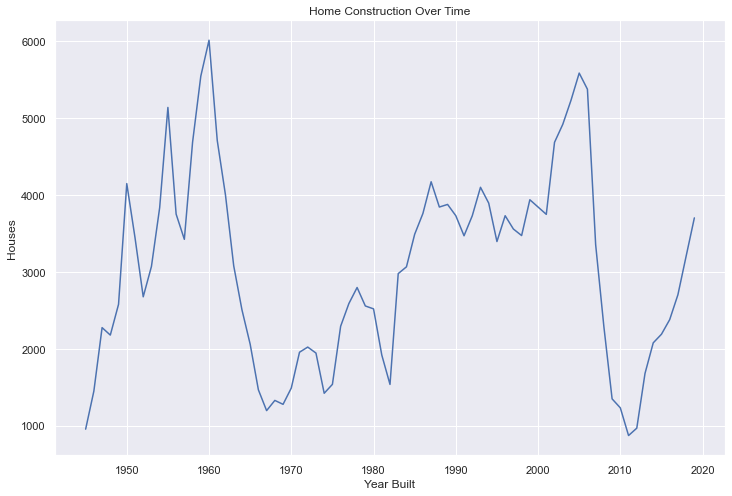

In [4]:
_ = plt.figure(figsize=(12,8))
_ = plt.title('Home Construction Over Time')
_ = plt.xlabel('Year Built')
_ = plt.ylabel('Houses')
df2 = df[(df['actual_yr_built']>1944)&(df['actual_yr_built']<2020)][['actual_yr_built','building']]
df2 = df2.groupby('actual_yr_built').agg('count')
_ = sns.lineplot(x=df2.index, y=df2.building, ci=False) 

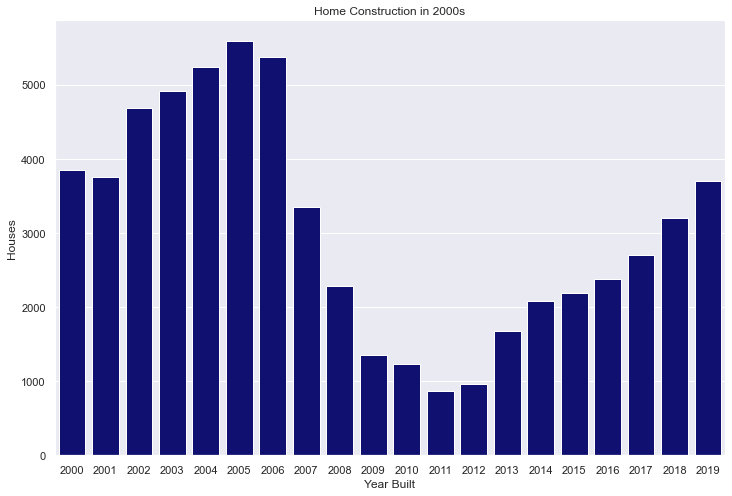

In [5]:
df3 = df2.loc['2000':]
_ = plt.figure(figsize=(12,8))
_ = plt.title('Home Construction in 2000s')
_ = sns.barplot(x=df3.index, y=df3.building, color='Navy')
_ = plt.xlabel('Year Built')
_ = plt.ylabel('Houses')

### Market Statistics by Zip Code

In [6]:
df['zipcode'] = df.zipcode.astype('category')

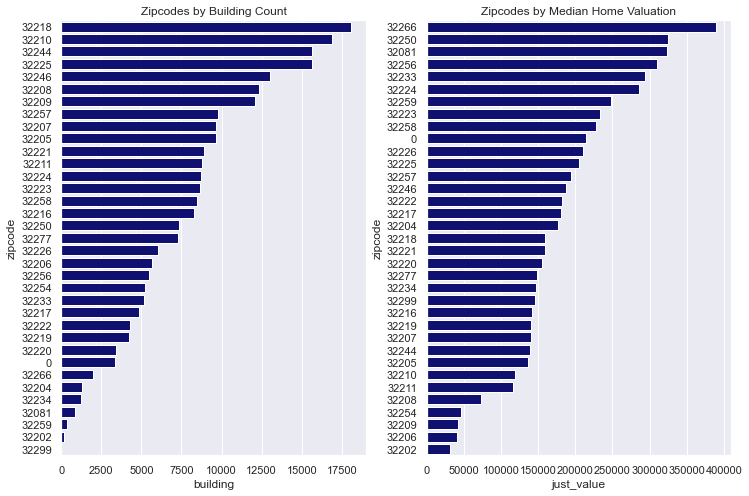

In [7]:
df4 = df[['just_value','zipcode','building']].groupby('zipcode')\
      .agg({'just_value':'median','building':'count'})
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(12,8))
_ = axes[0].set_title('Zipcodes by Building Count')
_ = sns.barplot(data=df4, y=df4.index, x='building', color='Navy', ax=axes[0],
               order=df4.sort_values('building', ascending=False).index)
_ = axes[1].set_title('Zipcodes by Median Home Valuation')
_ = sns.barplot(data=df4, y=df4.index, x='just_value', color='Navy', ax=axes[1],
               order=df4.sort_values('just_value',ascending=False).index)

### Adj. Home Values

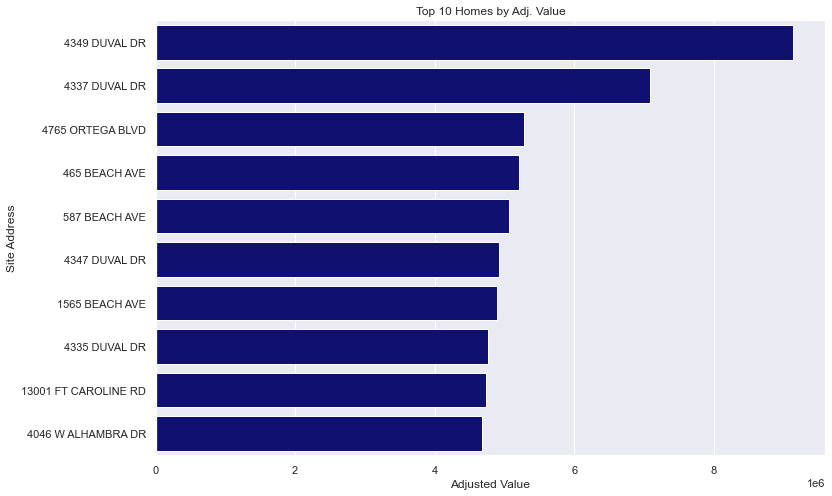

In [8]:
top_homes = df[['site_address','adj_just_value']].sort_values(by='adj_just_value',ascending=False).head(10)
_ = plt.figure(figsize=(12,8))
_ = plt.title('Top 10 Homes by Adj. Value')
_ = sns.barplot(data=top_homes, x='adj_just_value', y='site_address', color='Navy')
_ = plt.xlabel('Adjusted Value')
_ = plt.ylabel('Site Address')

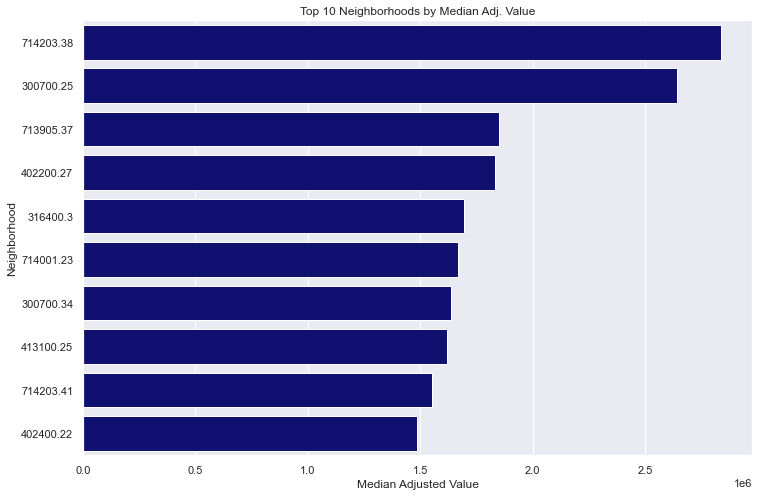

In [9]:
df['neighborhood'] = df.neighborhood.astype('str')
top_neighborhoods = df[['neighborhood','adj_just_value']].groupby('neighborhood', as_index=False)\
        .agg('median').sort_values(by='adj_just_value', ascending=False).head(10)
_ = plt.figure(figsize=(12,8))
_ = plt.title('Top 10 Neighborhoods by Median Adj. Value')
_ = sns.barplot(data=top_neighborhoods, x='adj_just_value', y='neighborhood', color='Navy')
_ = plt.xlabel('Median Adjusted Value')
_ = plt.ylabel('Neighborhood')

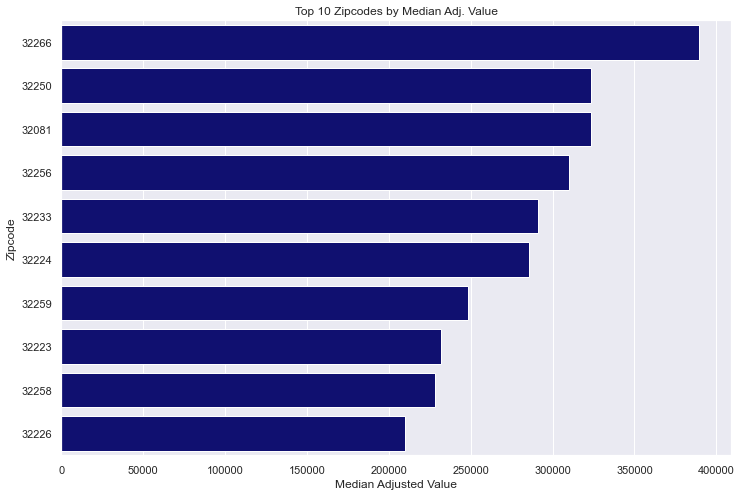

In [10]:
df['zipcode'] = df.zipcode.astype('str')
top_zips = df[['zipcode','adj_just_value']].groupby('zipcode', as_index=False)\
        .agg('median').sort_values(by='adj_just_value', ascending=False).head(10)
_ = plt.figure(figsize=(12,8))
_ = plt.title('Top 10 Zipcodes by Median Adj. Value')
_ = sns.barplot(data=top_zips, x='adj_just_value', y='zipcode', color='Navy')
_ = plt.xlabel('Median Adjusted Value')
_ = plt.ylabel('Zipcode')

### Characteristics and Features

C:\Users\robin\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


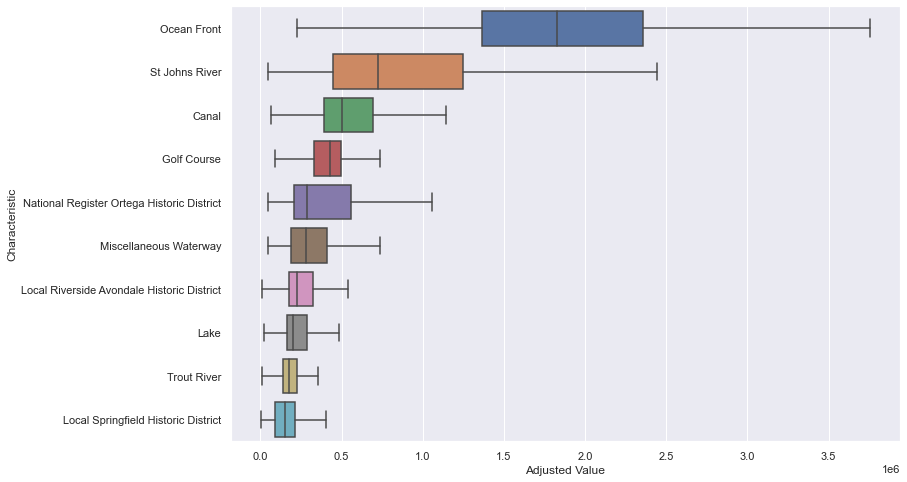

In [11]:
import numpy as np

new_cols = []
for col in df.columns:
    if col[:2]=='d_':
        new_cols.append(col)
new_cols.append('adj_just_value')
chars = df[new_cols]
for col in new_cols[:-1]:
    chars.loc[:,col] = chars[col].replace(0, np.nan)

def spec_df(empty_df, df, cols, substr, col_name):
    for col in cols:
        new_df = df.dropna(subset=[col])[[col,'adj_just_value']]
        new_df[col] = new_df[col].replace(1.0,str(col).replace(substr,''))
        new_df.rename(columns={col:col_name,'adj_just_value':'Adjusted Value'}, inplace=True)
        empty_df = empty_df.append(new_df)
    return empty_df
    
    
df5 = pd.DataFrame(columns=['Characteristic','Adjusted Value'])
df5 = spec_df(df5, chars, chars.columns[:-1], 'd_', 'Characteristic')
df5['Characteristic'] = df5.Characteristic.str.replace('_',' ')
df5['Characteristic'] = df5.Characteristic.str.replace('fielHist','field Hist')
df5.reset_index(inplace=True)

_ = plt.figure(figsize=(12,8))
_ = sns.boxplot(data=df5, x='Adjusted Value', y='Characteristic', showfliers=False,
               order=['Ocean Front', 'St Johns River', 'Canal', 'Golf Course', 
                     'National Register Ortega Historic District', 'Miscellaneous Waterway',
                     'Local Riverside Avondale Historic District', 'Lake',
                     'Trout River', 'Local Springfield Historic District'])

C:\Users\robin\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


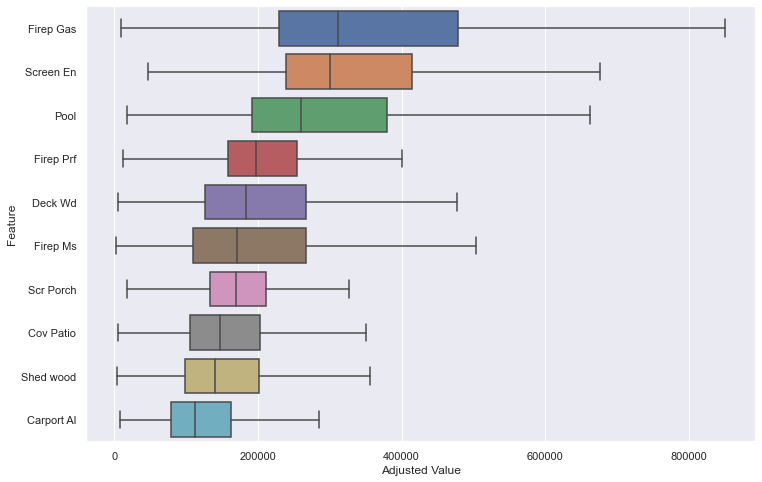

In [12]:
new_cols = []
for col in df.columns:
    if col[:3]=='ft_':
        new_cols.append(col)
new_cols.append('adj_just_value')
feats = df[new_cols]
for col in new_cols[:-1]:
    feats.loc[:,col] = feats[col].replace(0, np.nan)

df5 = pd.DataFrame(columns=['Feature','Adjusted Value'])
df5 = spec_df(df5, feats, feats.columns[:-1], 'ft_', 'Feature')
df5['Feature'] = df5.Feature.str.replace('_',' ')
df5.reset_index(inplace=True)

_ = plt.figure(figsize=(12,8))
_ = sns.boxplot(data=df5, x='Adjusted Value', y='Feature', showfliers=False,
               order=['Firep Gas', 'Screen En', 'Pool', 'Firep Prf', 'Deck Wd', 'Firep Ms',
                     'Scr Porch', 'Cov Patio', 'Shed wood', 'Carport Al'])

C:\Users\robin\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


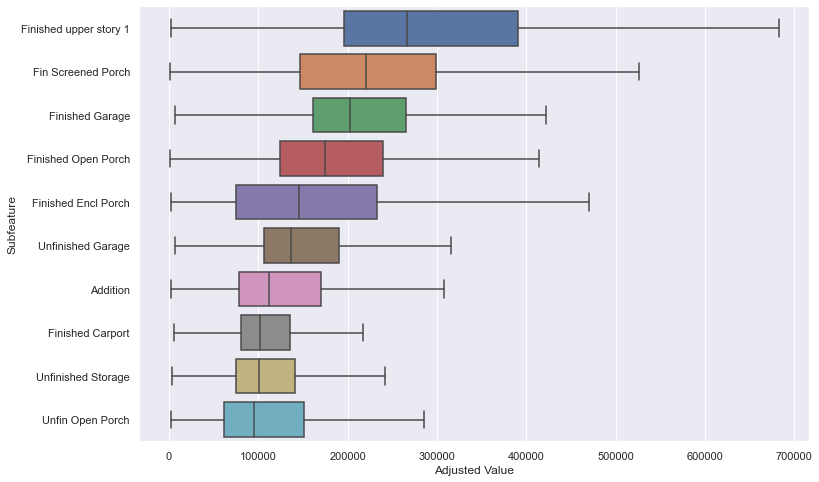

In [13]:
new_cols = []
for col in df.columns:
    if col[:4]=='sub_' and col[4]!='f':
        new_cols.append(col)
new_cols.append('adj_just_value')
subs = df[new_cols]
for col in new_cols[:-1]:
    subs.loc[:,col] = subs[col].replace(0, np.nan)

df5 = pd.DataFrame(columns=['Subfeature','Adjusted Value'])
df5 = spec_df(df5, subs, subs.columns[:-1], 'sub_', 'Subfeature')
df5['Subfeature'] = df5.Subfeature.str.replace('_',' ')
df5.reset_index(inplace=True)

_ = plt.figure(figsize=(12,8))
_ = sns.boxplot(data=df5, x='Adjusted Value', y='Subfeature', showfliers=False, 
               order=['Finished upper story 1', 'Fin Screened Porch', 'Finished Garage',
                      'Finished Open Porch', 'Finished Encl Porch', 'Unfinished Garage',
                      'Addition', 'Finished Carport', 'Unfinished Storage', 'Unfin Open Porch'])

### Home Sales

In [14]:
df = pd.read_csv("D:\Data\HomeSales.csv")

<ipython-input-15-be097ec82612>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annuals['sale_date'] = pd.to_datetime(annuals.sale_date)
<ipython-input-15-be097ec82612>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annuals['Year'] = annuals.sale_date.dt.year


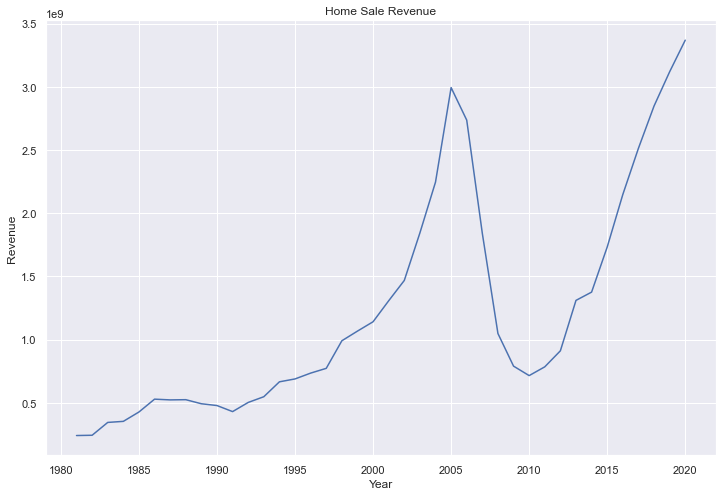

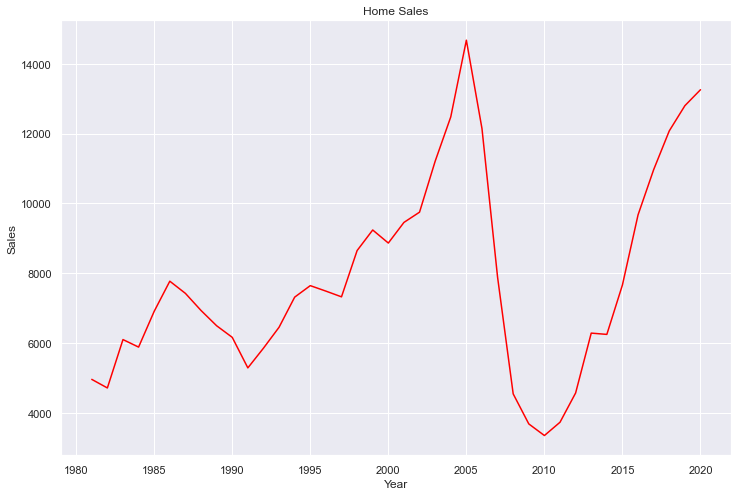

In [15]:
annuals = df[['sale_date','price']]
annuals['sale_date'] = pd.to_datetime(annuals.sale_date)
annuals['Year'] = annuals.sale_date.dt.year
annuals = annuals[annuals.Year > 1980]
annuals2 = annuals.groupby('Year', as_index=False).agg('sum')
annuals2.rename(columns={'price':'Revenue'}, inplace=True)

_ = plt.figure(figsize=(12,8))
_ = plt.title('Home Sale Revenue')
_ = sns.lineplot(data=annuals2, x='Year', y='Revenue')

_ = plt.figure(figsize=(12,8))
annuals3 = annuals.groupby('Year', as_index=False).agg('count')
annuals3.rename(columns={'price':'Sales'}, inplace=True)
_ = plt.title('Home Sales')
_ = sns.lineplot(data=annuals3, x='Year', y='Sales', color='Red')
